### input: npz file

['phases']
Data shape: (1000, 30000), min=0.0, max=6.28000020980835
time data points:  5000
node data points:  1000


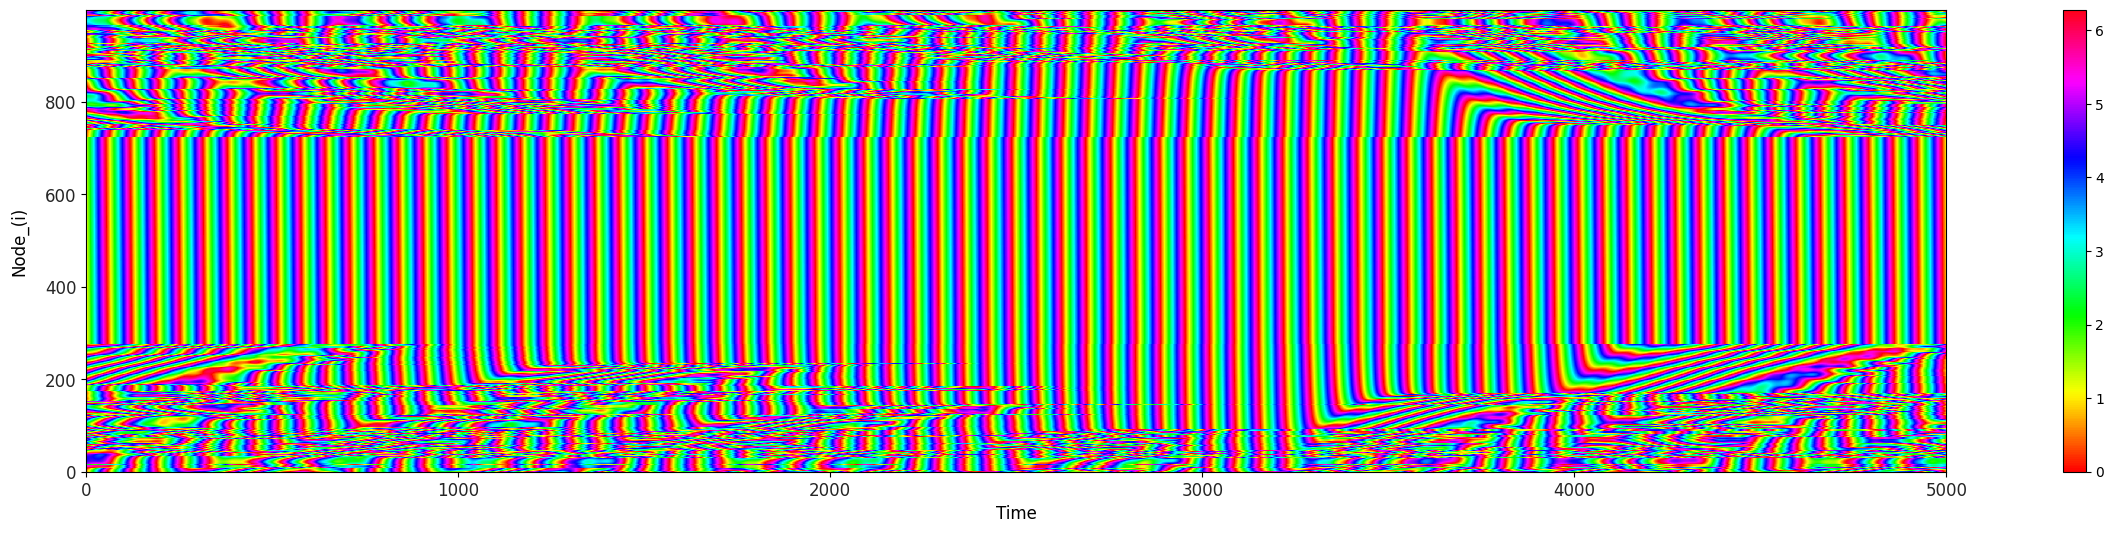

In [7]:
coupling_value=2.11

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import hsv_to_rgb


# Define the colors for the custom cyclic colormap
colors = [
    (1.0, 0.0, 1.0),  # Magenta (255, 0, 255)
    (1.0, 0.0, 0.0),  # Red (255, 0, 0)
    #(1.0, 0.5, 0.0),  # Orange (255, 128, 0)
    (1.0, 1.0, 0.0),  # Yellow (255, 255, 0)
    (0.0, 1.0, 0.0),  # Green (0, 255, 0)
    (0.0, 1.0, 1.0),  # Cyan (0, 255, 255)
    (0.0, 0.0, 1.0),  # Blue (0, 0, 255)
    (1.0, 0.0, 1.0)   # Magenta (255, 0, 255)
]

# Create the custom cyclic colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# load data forward.npz
scale_factor = 100  
# Load data from .npz file
data = np.load(f'./Data/Degree_Radian=1.57_copling={coupling_value}layer2(time)VS(Node).npz')
print( data.files)
# Assuming the array is stored with a key - you might need to check data.files to see available keys
# For example, if the data is stored with key 'arr_0':
lines=data['phases'].astype(np.float32) / scale_factor


# Save to text file with 2 decimal digits
np.savetxt(f'phases_scaled_coupling_{coupling_value}.txt', lines, fmt='%.2f')


# Transpose if needed (depending on how your data is structured)
lines = lines.transpose()
print(f"Data shape: {lines.shape}, min={np.min(lines)}, max={np.max(lines)}")


# Keep only first 1000 time steps
lines = lines[:, :5000]

time = lines.shape[1]  # Number of time points
node_count = lines.shape[0]   # Number of nodes
print("time data points: ",time)
print("node data points: ",node_count)


# Create figure with adjusted size and layout
fig = plt.figure(figsize=(30, 6))  # Wider than tall (adjust these values as needed)
#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
#plot
plt.imshow(lines, cmap='hsv', aspect='auto', interpolation='nearest')
plt.colorbar()

plt.xlim(0,time)
plt.ylim( node_count - 1,0)  # Set y-axis limits from 0 to number of nodes-1
# Reverse the y-axis direction
plt.gca().invert_yaxis()

plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False,  labelsize=12, labelcolor='#262626')
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False,  labelsize=12, labelcolor='#262626')
plt.ylabel('Node_(i)',  fontsize=12, labelpad=12)
plt.xlabel('Time',  fontsize=12)

#plt.gca().set_ylim(plt.gca().get_ylim()[::-1])# Reverse the y-axis direction
#_________________________________________________________

#plt.gcf().set_size_inches(12, 4)         

output_path = f'./PhasePattern_coupling={coupling_value}.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')



### text file

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Define the colors for the custom cyclic colormap
colors = [
    (1.0, 0.0, 1.0),  # Magenta (255, 0, 255)
    (1.0, 0.0, 0.0),  # Red (255, 0, 0)
    #(1.0, 0.5, 0.0),  # Orange (255, 128, 0)
    (1.0, 1.0, 0.0),  # Yellow (255, 255, 0)
    (0.0, 1.0, 0.0),  # Green (0, 255, 0)
    (0.0, 1.0, 1.0),  # Cyan (0, 255, 255)
    (0.0, 0.0, 1.0),  # Blue (0, 0, 255)
    (1.0, 0.0, 1.0)   # Magenta (255, 0, 255)
]

# Create the custom cyclic colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)



# Create figure with adjusted size and layout
fig = plt.figure(figsize=(12, 6))  # Wider than tall (adjust these values as needed)
#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Main plot
#ax_1 = plt.subplot(3, 4, (1, 4))

# Read the input data
with open(f"./Data/Degree_Radian=1.57_copling=0.39layer2(time)VS(Node).txt") as textFile:            
    lines = [line.split()[1:] for line in textFile]  # [1:] skips first column

lines = np.array(lines, dtype=float).transpose()  # Convert to numpy array and transpose
print(np.min(lines))
time = len(lines[0])
#N=len(lines[1])
print(time)

#plot
plt.imshow(lines, cmap=custom_cmap, aspect='auto', interpolation='nearest')
plt.colorbar()

plt.xlim(0,time)


plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False,  labelsize=12, labelcolor='#262626')
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False,  labelsize=12, labelcolor='#262626')
plt.ylabel('Node_(i)',  fontsize=12, labelpad=12)
plt.xlabel('Time',  fontsize=12)
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])# Reverse the y-axis direction
#_________________________________________________________

#plt.gcf().set_size_inches(12, 4)         

plt.savefig(f'./new2.png', dpi=300, bbox_inches='tight')

